Importing libraries

In [14]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

Downloading the dataset

In [15]:
train = datasets.MNIST(root='data', transform=ToTensor(), train=True, download=True)
test = datasets.MNIST(root='data', transform=ToTensor(), train=False, download=True)

dataset = DataLoader(train, 32) #batch size = 32

Creating a pytorch neural network

* 1 - input channel, it's 1 because it's black and white, 32 - filters of shape 3x3
* The expression 28 - 6 calculates the spatial dimension after applying all three convolutional layers, resulting in a spatial dimension of 22x22 pixels. This reduction is due to each convolutional layer reducing the spatial dimension by 2 pixels along each side, resulting in a total reduction of 6 pixels from the original 28x28 image size.
* 64*(28-6)*(28-6) computes the total number of features produced by the convolutional layers, which is then used as the input size for the subsequent fully connected (linear) layer.



In [22]:
class Neural(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(1, 32, (3,3)),
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3)),
            nn.ReLU(),
            nn.Conv2d(64, 64, (3,3)),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64*(28-6)*(28-6),10)
        )

  def forward(self,x):
      return self.model(x)


Instance of the neural network, loss and optimizers

In [23]:
clf = Neural()
opt = Adam(clf.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()


Training flow

In [25]:
if __name__=="__main__":
  for epochs in range(2):
    for batch in dataset:
      X,y = batch
      pred = clf(X)
      loss = loss_fn(pred,y)

      opt.zero_grad()
      loss.backward()
      opt.step()

      print(f"Epochs {epochs} Loss {loss.item()}")

Epochs 0 Loss 2.2986013889312744
Epochs 0 Loss 2.4395973682403564
Epochs 0 Loss 2.1870572566986084
Epochs 0 Loss 2.0536344051361084
Epochs 0 Loss 2.097144842147827
Epochs 0 Loss 2.0487794876098633
Epochs 0 Loss 1.4027034044265747
Epochs 0 Loss 1.4576979875564575
Epochs 0 Loss 1.3429005146026611
Epochs 0 Loss 0.7883918881416321
Epochs 0 Loss 0.7517788410186768
Epochs 0 Loss 0.5321394205093384
Epochs 0 Loss 0.5867356657981873
Epochs 0 Loss 0.6037461161613464
Epochs 0 Loss 0.6171886324882507
Epochs 0 Loss 2.2868282794952393
Epochs 0 Loss 1.1869971752166748
Epochs 0 Loss 0.7801079154014587
Epochs 0 Loss 0.914648711681366
Epochs 0 Loss 0.7877511978149414
Epochs 0 Loss 0.8309957385063171
Epochs 0 Loss 0.4607085883617401
Epochs 0 Loss 0.6112861037254333
Epochs 0 Loss 0.6248077154159546
Epochs 0 Loss 0.8063400387763977
Epochs 0 Loss 0.6159631013870239
Epochs 0 Loss 0.7599418759346008
Epochs 0 Loss 0.7067745327949524
Epochs 0 Loss 0.8184874653816223
Epochs 0 Loss 0.7118437886238098
Epochs 0 Los

Testing prediction of a single image

In [31]:
test_image, true_image = test[0]
test_image = test_image.unsqueeze(0)
pred_image = clf(test_image)
pred_class = torch.argmax(pred_image,dim=1).item()

accuracy = 1 if pred_class == true_image else 0
print(f"(Predicted number: {pred_class}, True number: {true_image}, Accuracy: {accuracy})")

(Predicted number: 7, True number: 7, Accuracy: 1)


Testing prediction of a multiple image

In [40]:
for i in range(6):
  test_image, true_image = test[i]
  test_image = test_image.unsqueeze(0)
  pred_image = clf(test_image)
  pred_class = torch.argmax(pred_image,dim=1).item()

  accuracy = 1 if pred_class == true_image else 0
  print(f"(Predicted number: {pred_class}, True number: {true_image}, Accuracy: {accuracy})")

(Predicted number: 7, True number: 7, Accuracy: 1)
(Predicted number: 2, True number: 2, Accuracy: 1)
(Predicted number: 1, True number: 1, Accuracy: 1)
(Predicted number: 0, True number: 0, Accuracy: 1)
(Predicted number: 4, True number: 4, Accuracy: 1)
(Predicted number: 1, True number: 1, Accuracy: 1)


Prediction with image

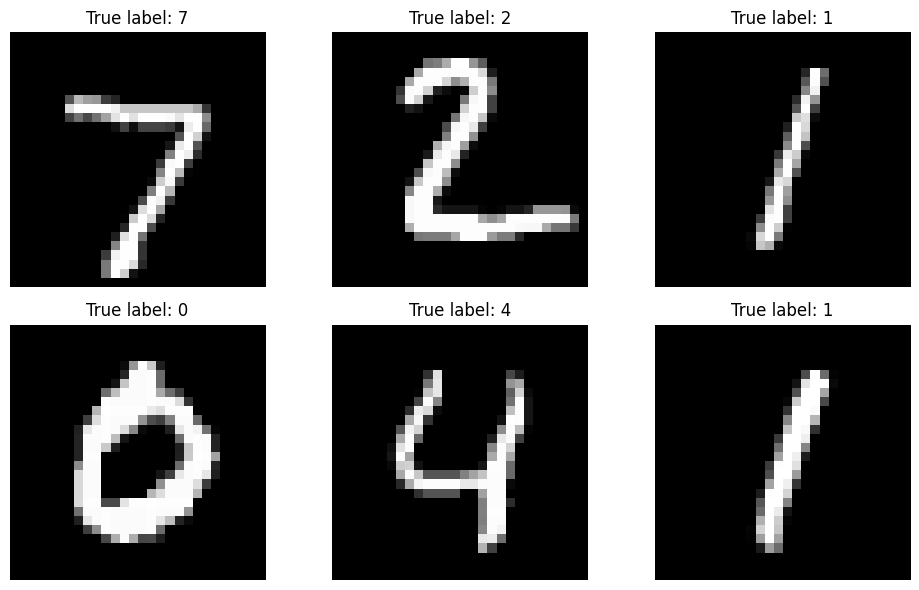

In [39]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

for i in range(6):
    test_image, true_image = test[i]

    ax = axs[i // 3, i % 3]  # Determine the subplot index
    ax.imshow(test_image.squeeze(), cmap='gray')
    ax.set_title(f"True label: {true_image}")
    ax.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()
